# House Prices: Advanced Regression Techniques

## Inleiding
In dit notebook zal worden onderzocht of er verbanden bestaan tussen de prijs van een huis en enkele kenmerken (oppervlakte, wijk, bouwjaar). Om dit te onderzoeken zijn er twee hypotheses opgesteld:

* De grootte van het huis en de wijk waarin het huis plaatsvindt hebben positieve invloed op de verkoopprijs. Hoe groter hoe duurder in specifieke wijken.
* Het bouwjaar van het huis en de wijk waarin het huis plaatsvindt hebben positieve invloed op de verkoopprijs. Hoe nieuwer hoe duurder in specifieke wijken.

## Dataset
De data die wordt gebruikt is afkomstig van de Kaggle.com competitie [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

De data beschrijft 79 variabelen van (bijna) elk aspect omtrent een woonhuis in Aimes, Iowa (Verenigde Staten).

# Uitwerking
Om te beginnen zal de data worden ingeladen, worden schoongemaakt en worden geselecteerd, zodat de gewenste gegevens overblijven.

In [25]:
#Libraries inladen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
#Waarschuwingen onderdrukken
import warnings
warnings.filterwarnings('ignore')
#Matplotlib grafieken in het notebook weergeven
%matplotlib inline

In [2]:
#Data inladen
df_train = pd.read_csv('train.csv')

In [3]:
#Kolommen bekijken
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Eerste 5 rijen bekijken ter controle
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Laatste 5 rijen bekijken ter controle
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
#Datatypes van de kolommen bekijken
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# Variabelen
De variabelen die nodig zijn:
* *SalePrice* (numriek) ($)
* *LotArea* (numeriek) (Sq. Ft.)
* *Neighborhood* (categorie)
* *YearBuilt* (numeriek in de data maar wordt gezien als categorie)



# Missende waarden
Hier wordt bekeken of er ontbrekende waarden zijn in de (benodigde) data.

In [7]:
missende_data = df_train.isnull().sum().sort_values(ascending=False)
missende_data

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [8]:
#Variabelen bekijken
#PoolQC ter controle
print('PoolQC: ', missende_data.loc['PoolQC'])
print('SalePrice: ', missende_data.loc['SalePrice'])
print('LotArea: ', missende_data.loc['LotArea'])
print('Neighborhood: ', missende_data.loc['Neighborhood'])
print('YearBuilt: ', missende_data.loc['YearBuilt'])

PoolQC:  1453
SalePrice:  0
LotArea:  0
Neighborhood:  0
YearBuilt:  0


Uit bovenstaande resultaten is te halen dat er geen missende waarden zijn in de benodigde data en er dus geen verdere stappen uitgevoerd hoeven te worden.

# Data Analyse
Nu we het een en ander van de data weten kunnen we de gewenste infomatie verzamelen en verder analyseren.

In [9]:
#Data selecteren
df_train = df_train[['Id', 'SalePrice', 'LotArea', 'Neighborhood', 'YearBuilt']]
#Controleren
df_train.head()

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
0,1,208500,8450,CollgCr,2003
1,2,181500,9600,Veenker,1976
2,3,223500,11250,CollgCr,2001
3,4,140000,9550,Crawfor,1915
4,5,250000,14260,NoRidge,2000


## Correlatie

Een snelle manier om correlaties te vinden en te visualiseren is de de *Heatmap* van Seaborne in combinatie met de *corr()* functie van Pandas. De *corr()* functie berekent de correlatie volgens de methode van Pearson.

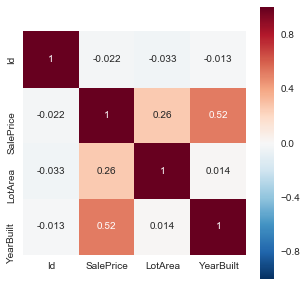

In [10]:
#Correlatie matrix visualiseren
correlatie_matrix = df_train.corr(method='pearson')
plt.subplots(figsize=(5,5))
sns.heatmap(correlatie_matrix, vmin=-1.0, vmax=1.0, square=True, annot=True)

In bovenstaand figuur is te zien dat er een lichte correlatie te vinden is tussen:
* *SalePrice* en *YearBuilt*.
* *SalePrice* en *LotArea* hebben een erg lage correlatie.

Merk op dat *Neighborhood* niet in het figuur staat, omdat *Neighborhood* een categoriale variabele is.

## SalePrice
De belangrijkste variabele is *SalePrice*. Zoals de naam al aangeeft is dit de prijs waarvoor het huis verkocht is.

*SalePrice* en de mogelijke relaties met andere variabelen zullen hieronder verder bekenen worden.

In [11]:
#Enkele statistieken van SalePrice bekijken
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Minimum: 34900.00
* Mediaan: 180921.20
* Maximum: 755000.00
* Standaard deviatie: 79442.50 

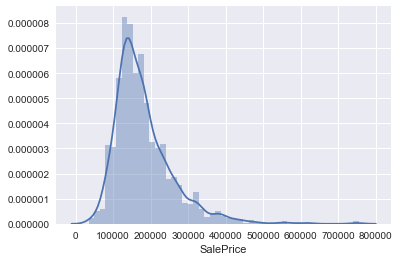

In [12]:
#SalePrice plotten in een histogram
sns.distplot(df_train['SalePrice'])

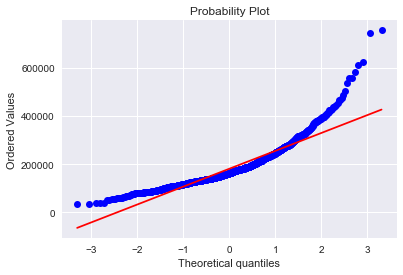

In [13]:
figuur = stats.probplot(df_train['SalePrice'], plot=plt)

In bovenstaande figuren is te zien dat er geen sprake is van een normaalverdeling. Dit is te snel te zien aan de datapunten die de rechte lijn niet volgen. Ook is in het histogram te zien dat er sprake is van lichte *right (positive) skew*.



## Numerieke waarden

Vervolgens kunnen we de overige numerieke waarden analyseren.

### LotArea

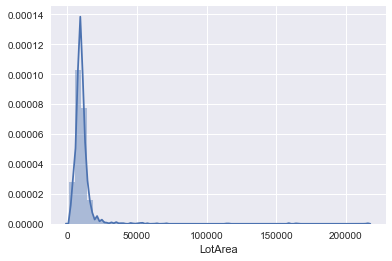

In [14]:
#LotArea plotten in een histogram
sns.distplot(df_train['LotArea'])

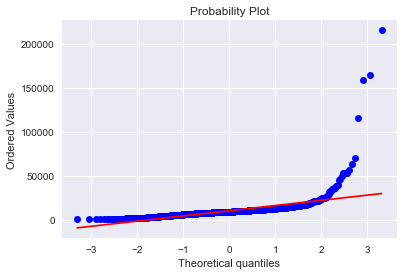

In [15]:
figuur = stats.probplot(df_train['LotArea'], plot=plt)

Ook bij *LotArea* is er geen sprake van een normaalverdeling. Dit komt hoofdzakelijk door enkele flinke uitschieters (outliars).

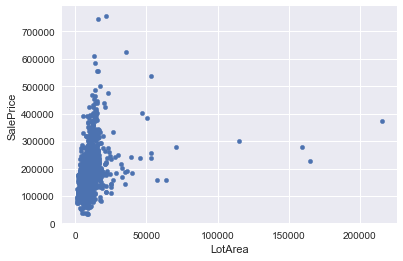

In [16]:
#Scatter plot van LotArea tegen SalePrice
df_scatter = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
df_scatter.plot.scatter(x='LotArea', y='SalePrice')

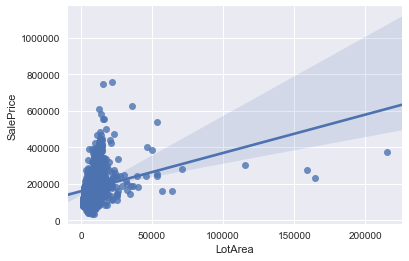

In [17]:
#Regressie plot van LotArea tegen SalePrice
sns.regplot(x='LotArea', y='SalePrice', data=df_scatter)

In bovenstaande scatter en regressie plots is te zien dat de meeste datapunten zich in een cluster bevinden. Er zijn enkele flinke outliars te constateren. Mogelijke verklaringen voor deze outliars kunnen zijn:
* Het stuk grond is van ondermaatse kwaliteit.
* De ligging van het stuk grond is niet gunstig voor de verkoop.
* Landbouwgrond.
* Mogelijk sprake van faillissements verkoop.

Het zou interessant kunnen zijn wat er met het regressie plot gebeurt als de grootste outliars uit de data worden gehaald.

#### Outliars

In [18]:
#Grootste 4 outliars opzoeken
df_outliars_dropped = df_train.sort_values(by='LotArea', ascending=False)
df_outliars_dropped[:4]

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
313,314,375000,215245,Timber,1965
335,336,228950,164660,Timber,1965
249,250,277000,159000,ClearCr,1958
706,707,302000,115149,ClearCr,1971


In [19]:
#Grootste 4 outliars verwijderen
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 314].index)
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 336].index)
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 250].index)
df_outliars_dropped = df_outliars_dropped.drop(df_outliars_dropped[df_outliars_dropped['Id'] == 707].index)
#Controleren of de eerste 4 wel echt weg zijn.
df_outliars_dropped[:4]

,Id,SalePrice,LotArea,Neighborhood,YearBuilt
451,452,280000,70761,ClearCr,1975
1298,1299,160000,63887,Edwards,2008
1396,1397,160000,57200,Timber,1948
769,770,538000,53504,StoneBr,2003


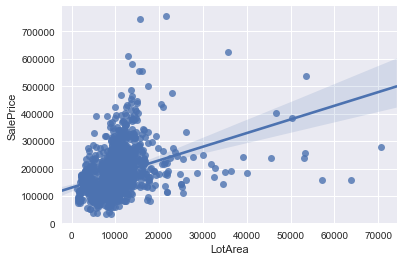

In [20]:
#Regressie plot van LotArea tegen SalePrice zonder grootste outliars
sns.regplot(x='LotArea', y='SalePrice', data=df_outliars_dropped)

Zoals hierboven te zien is, is er nog steeds sprake van flinke spreiding. Nog meer datapunten verwijderen is nu niet meer gewenst om de integriteit van de data te bewaren.

#### Lineaire Regressie
Ondanks dat *SalePrice* tegen *LotArea* niet het beste voorbeeld is om lineaire regressie op toe te passen, zullen we dit toch doen om een Machine Learning techniek te gebruiken in dit onderzoek.

In [37]:
#Data preppen
X = df_outliars_dropped['LotArea']
y = df_outliars_dropped['SalePrice']
print(X.shape)
print(y.shape)
X = X.reshape(1456, 1)
y = y.reshape(1456, 1)
print(X.shape)
print(y.shape)

(1456,)
(1456,)
(1456, 1)
(1456, 1)


In [40]:
#Model bouwen
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

[ 130376.394537]
[[ 4.97492541]]


$$y=4.97492541*x+130376.394537$$

In [41]:
#Model gebruiken voor voorspellingen
lm.predict(X)[0:5]

array([[ 482407.09118782],
       [ 448209.45394728],
       [ 414942.12775766],
       [ 396554.80345724],
       [ 395176.74911979]])

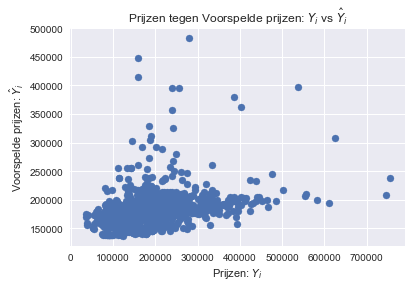

In [42]:
#Prediction vs Actual plotten
plt.scatter(df_outliars_dropped['SalePrice'], lm.predict(X))
plt.xlabel("Prijzen: $Y_i$")
plt.ylabel("Voorspelde prijzen: $\hat{Y}_i$")
plt.title("Prijzen tegen Voorspelde prijzen: $Y_i$ vs $\hat{Y}_i$")

In [44]:
print(np.mean((y - lm.predict(X)) ** 2))

5490948906.5


Zoals te zien is de RMSE enorm en is dit dus geen betrouwbaar model.

## Categoriale waarden

Vervolgens kunnen ook de categoriale waarden onder de loep worden genomen.

### YearBuilt

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

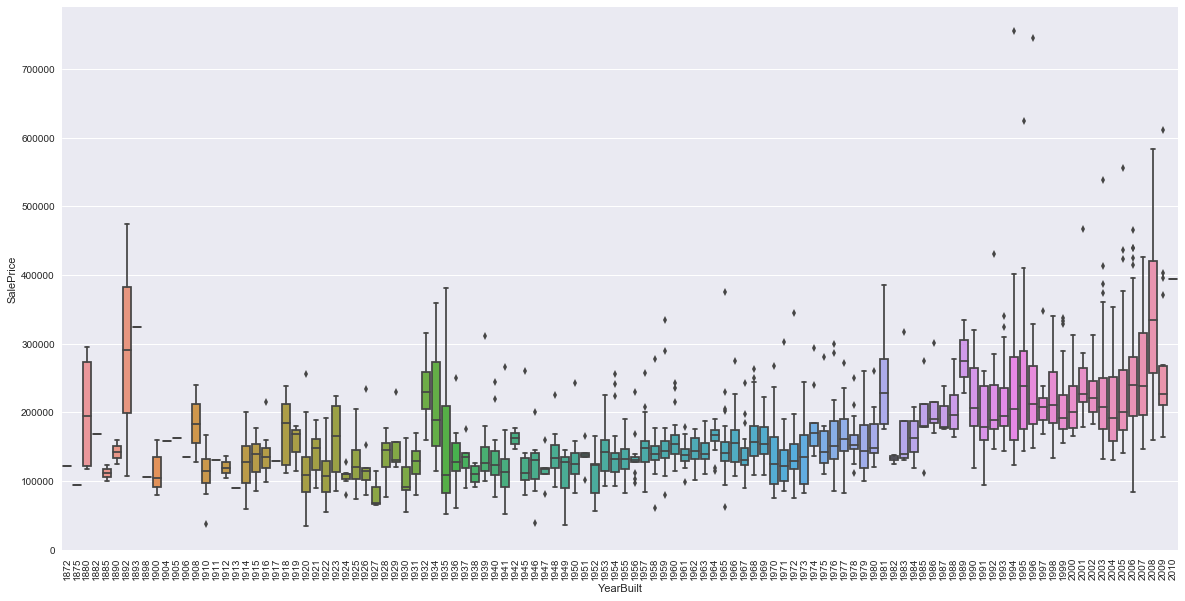

In [21]:
#Box plot van YearBuilt tegen SalePrice
df_box = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
plt.subplots(figsize=(20, 10))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_box)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

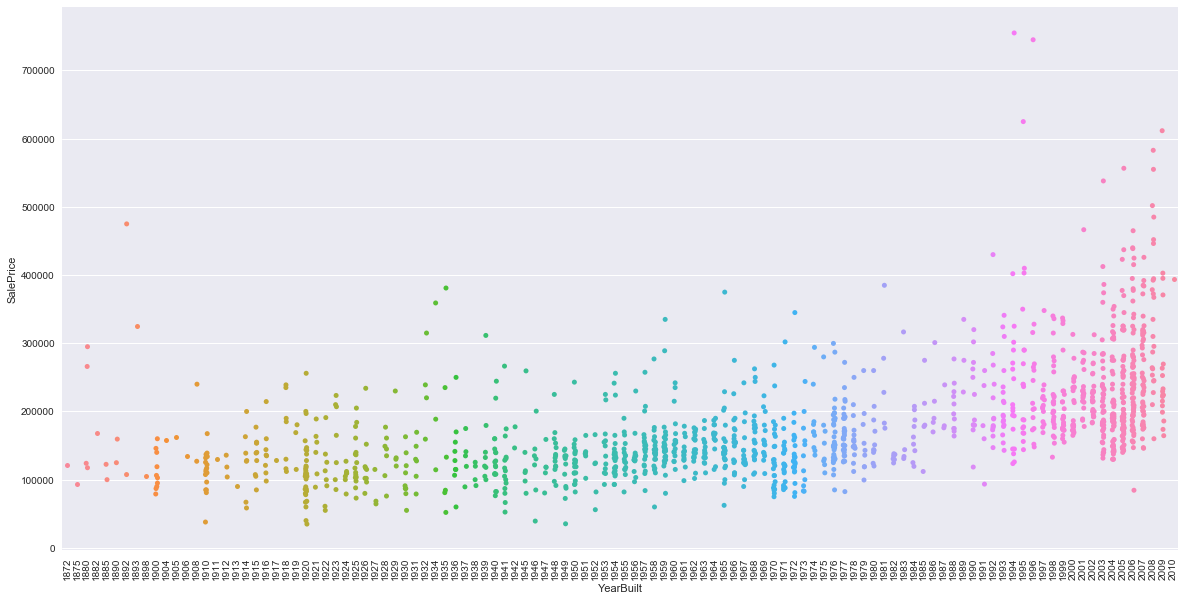

In [22]:
#Strip plot van YearBuilt tegen SalePrice, helpt om de spreiding van de datapunten binnen een jaar te visualiseren
plt.subplots(figsize=(20, 10))
sns.stripplot(x='YearBuilt', y='SalePrice', data=df_box, jitter=True)
plt.xticks(rotation=90)

Enkele interessante observaties:
* Ten tijde van de Great Depression en de Recession of 1937 (Augustus 1929 - 1937) was de spreiding van de prijzen vrij hoog en werd er erg weinig gebouwd.
* Tijdens Amerika's intrede in de Tweede Wereldoorlog (1941 - 1945) is dezelfde soort hoge spreiding te zien, waarna het weer rustiger wordt. Grondstoffen en arbeid gingen naar de *War Effort* in plaats van huizen.
* De Dot-com bubble tussen 1995 en 2001 is ook te zien, alle prijzen stegen flink en spreiding was enorm. De bubbel barste tussen 1999 en 2001, maar de gevolgen voor de prijzen zijn het beste te zien na 2002.
* Er zullen ongetwijfeld meer observaties kunnen worden gekoppeld aan economische gebeurtenissen, maar dat is niet het doel van dit onderzoek

### Neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

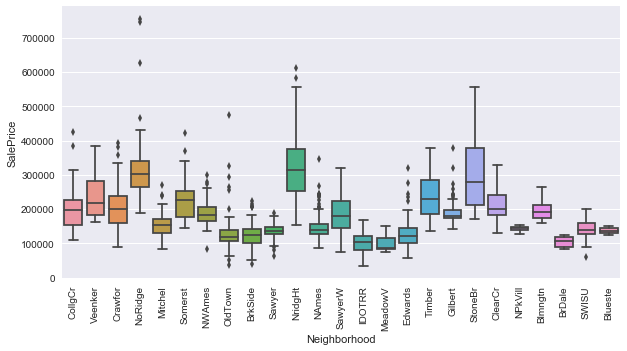

In [23]:
#Box plot van Neighborhood tegen SalePrice
df_box = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_box)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

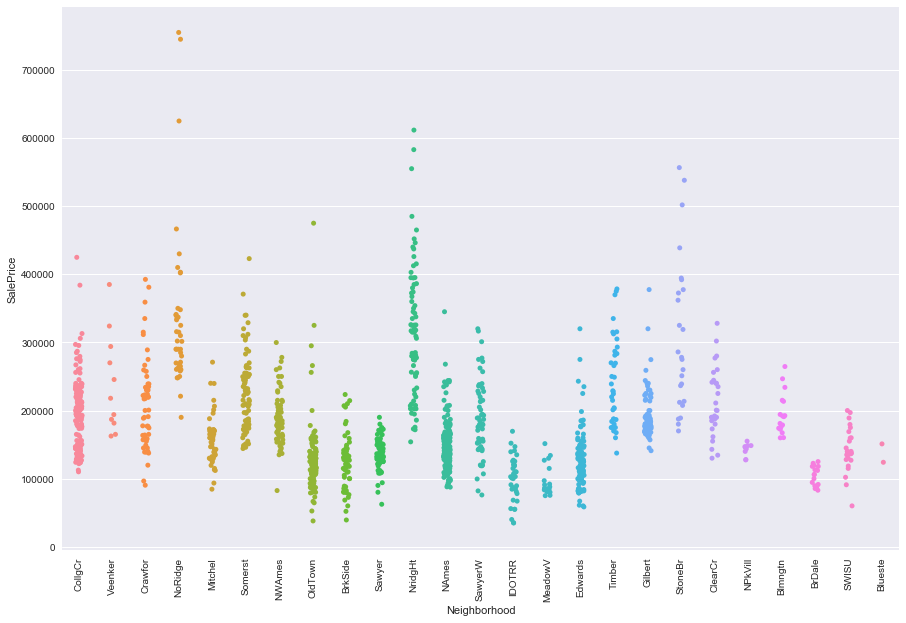

In [24]:
plt.subplots(figsize=(15, 10))
sns.stripplot(x='Neighborhood', y='SalePrice', data=df_box, jitter=True)
plt.xticks(rotation=90)

# Conclusies

## Hypothese 1
*De grootte van het huis en de wijk waarin het huis plaatsvindt hebben positieve invloed op de verkoopprijs. Hoe groter hoe duurder in specifieke wijken.*

## Hypothese 2
*Het bouwjaar van het huis en de wijk waarin het huis plaatsvindt hebben positieve invloed op de verkoopprijs. Hoe nieuwer hoe duurder in specifieke wijken.*